<center><h1>Machine Learning</h1>


<center><h3>Use PCA method to reduce the number of features for Breast Cancer Dataset from sklearn library and reduce it into 2 components.</h3>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

<h3>Load the Dataset</h3>

In [2]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()

In [3]:
breast_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
breast_cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [5]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [6]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
breast_cancer.data.shape

(569, 30)

In [8]:
cancer_df = pd.DataFrame(breast_cancer.data, columns=breast_cancer['feature_names'])
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<h3>Scale the data</h3>

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(cancer_df)

StandardScaler()

In [10]:
scaled_cancer_df = scaler.transform(cancer_df)
scaled_cancer_df.shape

(569, 30)

In [11]:
scaled_cancer_df[:4,:5]

array([[ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633],
       [ 1.82982061, -0.35363241,  1.68595471,  1.90870825, -0.82696245],
       [ 1.57988811,  0.45618695,  1.56650313,  1.55888363,  0.94221044],
       [-0.76890929,  0.25373211, -0.59268717, -0.76446379,  3.28355348]])

<h3>Apply PCA method</h3>

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(scaled_cancer_df)

PCA(n_components=2)

In [13]:
pca_cancer_df = pca.transform(scaled_cancer_df)
pca_cancer_df.shape

(569, 2)

In [14]:
pca_cancer_df = pd.DataFrame(pca_cancer_df, columns=['PCA_1', 'PCA_2'])
pca_cancer_df.head()

,PCA_1,PCA_2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


<h3>Visualize the data</h3>

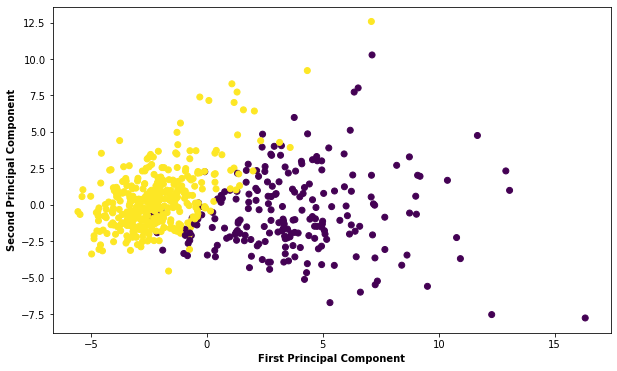

In [15]:
%matplotlib inline
plt.figure(figsize=(10,6))
plt.scatter(pca_cancer_df['PCA_1'], pca_cancer_df['PCA_2'], c=breast_cancer.target)
plt.xlabel("First Principal Component", fontweight='bold')
plt.ylabel("Second Principal Component", fontweight='bold')
plt.show()